# PyTorch - Easy

## Importy

In [126]:
import torch
import numpy as np
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

## Zadanie 1 - zrozumienie tensorów

### Tensor wypełniony zerami

In [10]:
tzeros = torch.zeros(2, 2)

In [11]:
tzeros

tensor([[0., 0.],
        [0., 0.]])

### Tensor wypełniony jedynkami

In [12]:
tones = torch.ones(2, 2)

In [13]:
tones

tensor([[1., 1.],
        [1., 1.]])

In [14]:
# wymuszenie typu int16
tones_int = torch.ones(3, 4, dtype=torch.int16)
tones_int

tensor([[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]], dtype=torch.int16)

### Wyciąganie typu

In [15]:
tones.dtype

torch.float32

### Tensor size

In [16]:
x = torch.tensor([2, 4, 6, 8])
x.size()

torch.Size([4])

In [17]:
x = torch.tensor([[1, 2, 3], [4, 5, 6]])
x.size()

torch.Size([2, 3])

### Scalary (0-dim tensor)

In [18]:
x = torch.tensor(2)
y = torch.tensor(5)

In [19]:
x + y

tensor(7)

In [20]:
x * y

tensor(10)

In [21]:
x / y

tensor(0.4000)

In [22]:
x.add(y)

tensor(7)

In [23]:
x.pow(8)

tensor(256)

### 1-dim tensor

In [24]:
x = torch.tensor([1, 2, 3, 4])
y = torch.ones(4)

In [25]:
x + y

tensor([2., 3., 4., 5.])

In [26]:
x * y

tensor([1., 2., 3., 4.])

In [27]:
x * 3

tensor([ 3,  6,  9, 12])

### 2-dim tensor

In [28]:
x = torch.randint(10, (3, 4))

In [29]:
x

tensor([[7, 3, 7, 0],
        [1, 2, 4, 0],
        [1, 7, 2, 6]])

In [30]:
x.transpose(0, 1)

tensor([[7, 1, 1],
        [3, 2, 7],
        [7, 4, 2],
        [0, 0, 6]])

In [31]:
x.transpose(1, 0)

tensor([[7, 1, 1],
        [3, 2, 7],
        [7, 4, 2],
        [0, 0, 6]])

In [32]:
x.transpose(1, 1)

tensor([[7, 3, 7, 0],
        [1, 2, 4, 0],
        [1, 7, 2, 6]])

In [33]:
x.transpose(0, 0)

tensor([[7, 3, 7, 0],
        [1, 2, 4, 0],
        [1, 7, 2, 6]])

In [34]:
x = torch.rand(3, 3)

In [35]:
x.det()

tensor(0.0224)

In [36]:
x

tensor([[0.6149, 0.5866, 0.1430],
        [0.1245, 0.3104, 0.1524],
        [0.9331, 0.9081, 0.4190]])

In [37]:
x * torch.tensor(5)

tensor([[3.0743, 2.9330, 0.7151],
        [0.6225, 1.5521, 0.7619],
        [4.6655, 4.5406, 2.0949]])

### n-dim tensor

In [38]:
image = torch.rand(64, 64, 3) # image 64x64 with rgb

In [39]:
image

tensor([[[0.7341, 0.1371, 0.7285],
         [0.8285, 0.7311, 0.2453],
         [0.4077, 0.0779, 0.3229],
         ...,
         [0.5464, 0.6336, 0.1027],
         [0.7221, 0.7052, 0.1300],
         [0.6100, 0.7745, 0.2578]],

        [[0.4149, 0.6283, 0.1252],
         [0.5271, 0.6931, 0.2739],
         [0.7620, 0.8198, 0.4426],
         ...,
         [0.0155, 0.9891, 0.1421],
         [0.3756, 0.5749, 0.3229],
         [0.8566, 0.0313, 0.7027]],

        [[0.0747, 0.7100, 0.2522],
         [0.7540, 0.2574, 0.7031],
         [0.9780, 0.7740, 0.7741],
         ...,
         [0.3720, 0.5868, 0.1712],
         [0.6279, 0.4786, 0.2633],
         [0.6783, 0.3152, 0.8629]],

        ...,

        [[0.8908, 0.4522, 0.1150],
         [0.3771, 0.6452, 0.8842],
         [0.1785, 0.5483, 0.9155],
         ...,
         [0.1592, 0.2759, 0.8836],
         [0.2763, 0.6221, 0.7747],
         [0.3016, 0.9472, 0.0656]],

        [[0.2390, 0.0547, 0.8869],
         [0.5503, 0.5201, 0.9517],
         [0.

In [40]:
image.mean(-1) # calculate mean at the last dim

tensor([[0.5332, 0.6016, 0.2695,  ..., 0.4276, 0.5191, 0.5474],
        [0.3894, 0.4981, 0.6748,  ..., 0.3822, 0.4245, 0.5302],
        [0.3456, 0.5715, 0.8421,  ..., 0.3767, 0.4566, 0.6188],
        ...,
        [0.4860, 0.6355, 0.5474,  ..., 0.4396, 0.5577, 0.4381],
        [0.3936, 0.6740, 0.7440,  ..., 0.6111, 0.2571, 0.7270],
        [0.6839, 0.5451, 0.6754,  ..., 0.5048, 0.5226, 0.6950]])

In [41]:
scale = torch.tensor([0.5, 0.5, 0.5]) # decrease intensity color

In [42]:
scale = scale.reshape(1, 1, 3)

In [43]:
scale

tensor([[[0.5000, 0.5000, 0.5000]]])

In [44]:
image * scale

tensor([[[0.3670, 0.0685, 0.3643],
         [0.4142, 0.3656, 0.1226],
         [0.2039, 0.0390, 0.1614],
         ...,
         [0.2732, 0.3168, 0.0514],
         [0.3611, 0.3526, 0.0650],
         [0.3050, 0.3873, 0.1289]],

        [[0.2074, 0.3141, 0.0626],
         [0.2636, 0.3466, 0.1369],
         [0.3810, 0.4099, 0.2213],
         ...,
         [0.0078, 0.4945, 0.0710],
         [0.1878, 0.2875, 0.1615],
         [0.4283, 0.0156, 0.3513]],

        [[0.0373, 0.3550, 0.1261],
         [0.3770, 0.1287, 0.3515],
         [0.4890, 0.3870, 0.3870],
         ...,
         [0.1860, 0.2934, 0.0856],
         [0.3139, 0.2393, 0.1317],
         [0.3392, 0.1576, 0.4315]],

        ...,

        [[0.4454, 0.2261, 0.0575],
         [0.1886, 0.3226, 0.4421],
         [0.0892, 0.2742, 0.4577],
         ...,
         [0.0796, 0.1379, 0.4418],
         [0.1381, 0.3111, 0.3874],
         [0.1508, 0.4736, 0.0328]],

        [[0.1195, 0.0273, 0.4435],
         [0.2752, 0.2600, 0.4759],
         [0.

### Reshape

In [45]:
x = torch.tensor([1, 2, 3, 4, 5, 6, 7, 8])

In [46]:
x

tensor([1, 2, 3, 4, 5, 6, 7, 8])

In [47]:
x.reshape(2, 4)

tensor([[1, 2, 3, 4],
        [5, 6, 7, 8]])

In [48]:
x1 = x.reshape(2, 2, 2)

In [49]:
x1

tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]]])

In [50]:
x1[0]

tensor([[1, 2],
        [3, 4]])

In [51]:
x1[0][1]

tensor([3, 4])

In [52]:
x[x > 3]

tensor([4, 5, 6, 7, 8])

## Zadanie 2 - Ładowanie i przetwarzanie danych

In [53]:
my_transform = transforms.ToTensor()

In [54]:
training_data = datasets.SVHN(root="./data/svhn/train", split='train', download=True, transform=my_transform)
test_data = datasets.SVHN(root="./data/svhn/test", split='test', download=True, transform=my_transform) 

Using downloaded and verified file: ./data/svhn/train/train_32x32.mat
Using downloaded and verified file: ./data/svhn/test/test_32x32.mat


In [55]:
training_data.labels

array([1, 9, 2, ..., 1, 6, 9])

In [56]:
training_data.__sizeof__()

24

In [57]:
training_data.data.size

225045504

In [58]:
training_data.data[0]

array([[[ 33,  15,  15, ...,  72,  82,  89],
        [ 28,  14,  14, ...,  40,  67,  83],
        [ 40,  18,  16, ...,  23,  35,  72],
        ...,
        [ 86,  87,  82, ..., 104, 104, 103],
        [ 84,  86,  82, ..., 110, 106, 106],
        [ 85,  89,  85, ..., 111, 109, 103]],

       [[ 30,  23,  17, ...,  65,  77,  79],
        [ 39,  25,  20, ...,  39,  58,  78],
        [ 41,  21,  17, ...,  29,  42,  69],
        ...,
        [ 81,  82,  79, ..., 104, 105, 105],
        [ 86,  79,  76, ..., 103, 105, 104],
        [ 88,  82,  79, ..., 104, 105, 106]],

       [[ 38,  19,  19, ...,  56,  57,  59],
        [ 35,  22,  17, ...,  50,  52,  60],
        [ 38,  26,  23, ...,  45,  44,  53],
        ...,
        [ 75,  71,  65, ...,  87,  81,  78],
        [ 64,  72,  72, ...,  84,  85,  86],
        [ 68,  72,  67, ...,  87,  86,  79]]], dtype=uint8)

In [59]:
img, label = training_data[0]

In [61]:
label

1

In [63]:
img.shape

torch.Size([3, 32, 32])

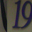

In [65]:
transforms.ToPILImage()(img)

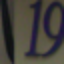

In [67]:
img2 = transforms.Resize([64, 64], antialias=True)(img)
transforms.ToPILImage()(img2)

In [70]:
img2 = transforms.RandomCrop([16, 16])(img)
transforms.ToPILImage()(img2)

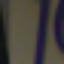

In [71]:
img2 = transforms.RandomResizedCrop([64, 64])(img)
transforms.ToPILImage()(img2)

In [72]:
img2 = transforms.CenterCrop([16, 16])(img)
transforms.ToPILImage()(img2)

In [80]:
img2 = transforms.FiveCrop(24)(img)
transforms.ToPILImage()(img2[4])

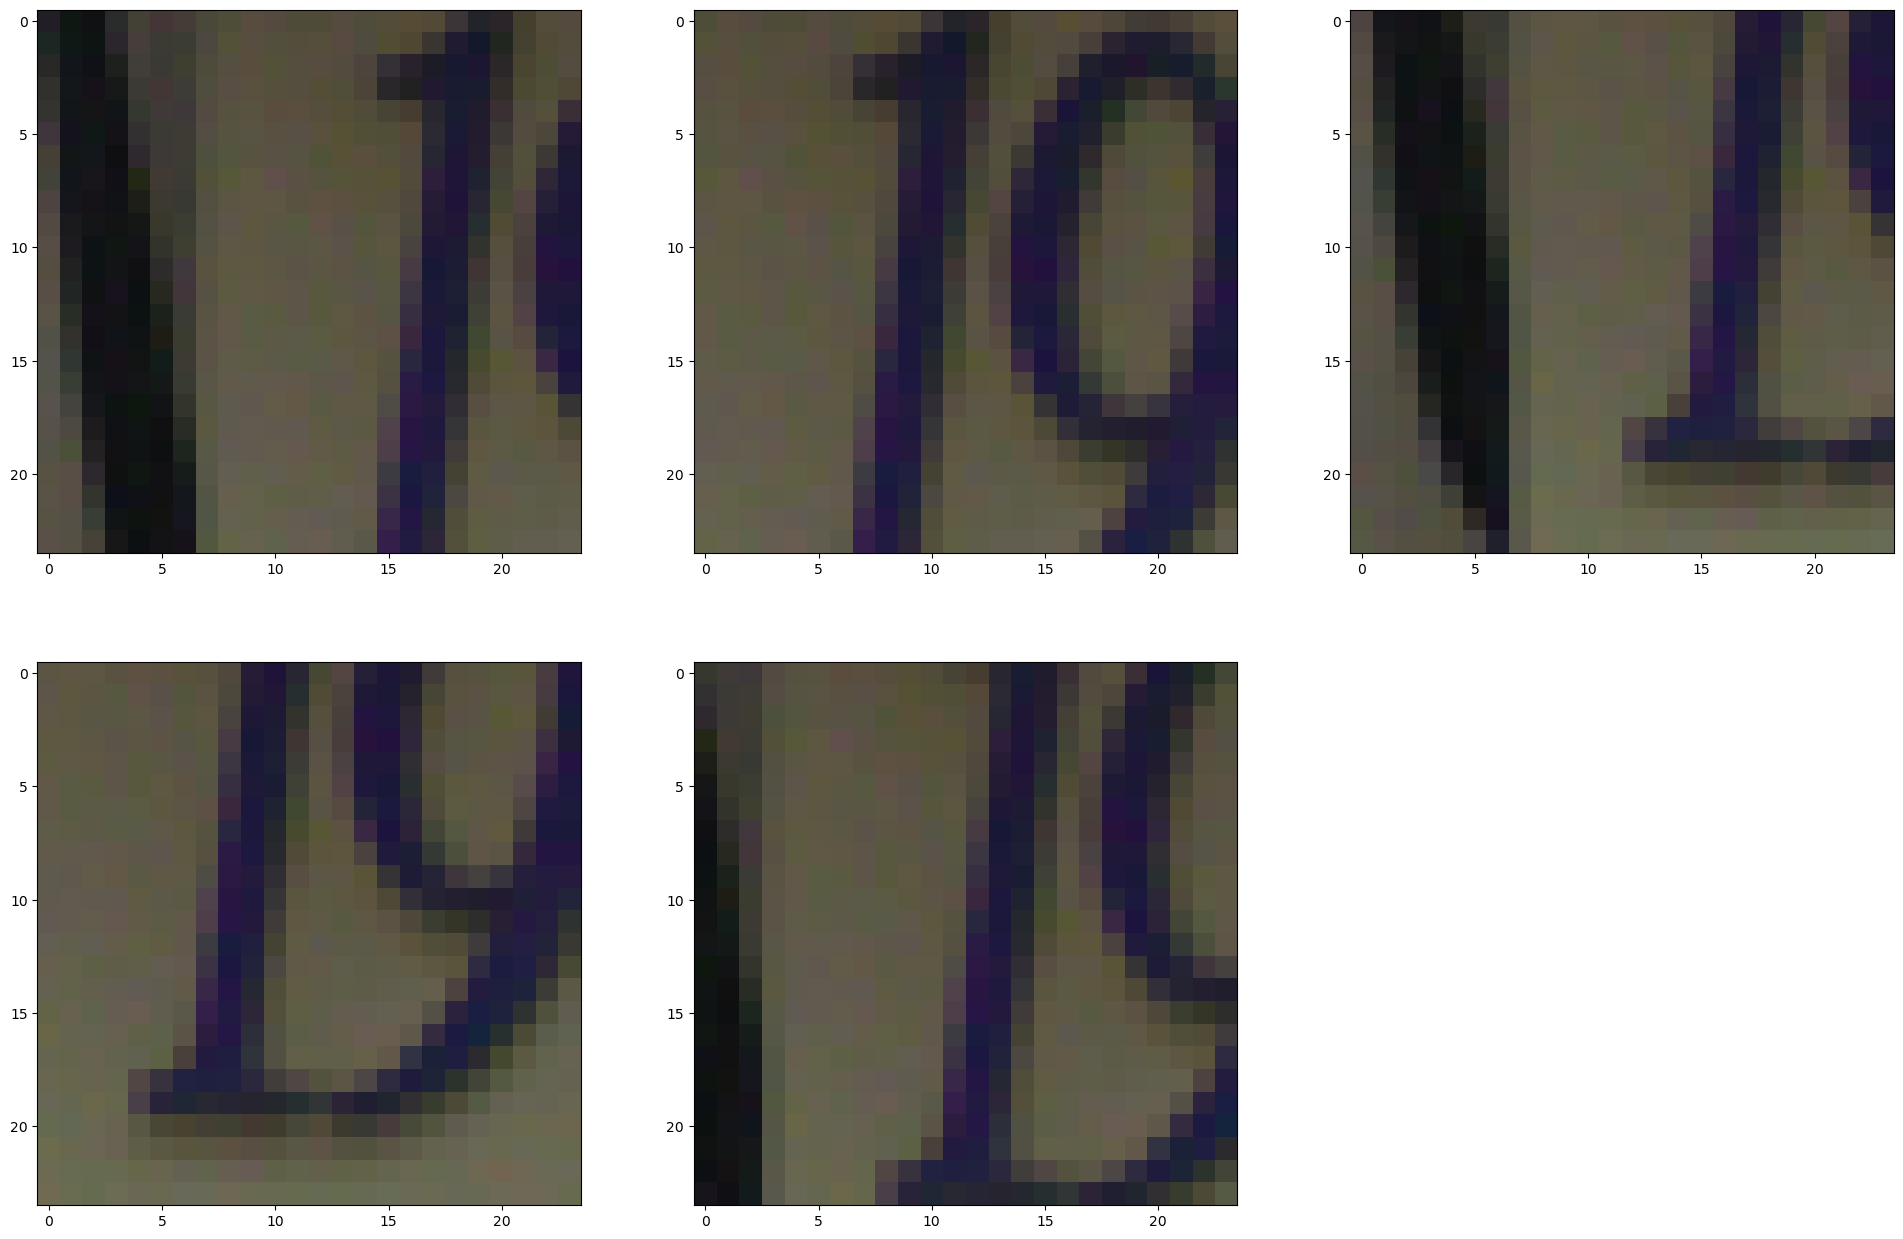

In [89]:
figure = plt.figure(figsize=(24, 24))
cols, rows = 3, 3
for i in range(1, 6):
    figure.add_subplot(rows, cols, i)
    plt.imshow(transforms.ToPILImage()(img2[i-1]))
plt.show()

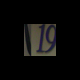

In [90]:
img2 = transforms.Pad(24)(img)
transforms.ToPILImage()(img2)

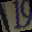

In [91]:
img2 = transforms.RandomRotation(30)(img)
transforms.ToPILImage()(img2)

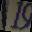

In [92]:
img2 = transforms.RandomAffine(30)(img)
transforms.ToPILImage()(img2)

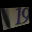

In [94]:
img2 = transforms.RandomPerspective()(img)
transforms.ToPILImage()(img2)

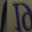

In [97]:
img2 = transforms.RandomVerticalFlip()(img)
transforms.ToPILImage()(img2)

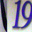

In [98]:
img2 = transforms.RandomAutocontrast(30)(img)
transforms.ToPILImage()(img2)

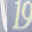

In [100]:
img2 = transforms.RandomInvert(30)(img)
transforms.ToPILImage()(img2)

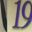

In [102]:
img2 = transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])(img)
transforms.ToPILImage()(img2)

In [105]:
mean, std = img.mean([1, 2]), img.std([1, 2])

In [104]:
mean

tensor([0.2650, 0.2522, 0.2302])

In [106]:
std

tensor([0.1122, 0.1081, 0.0633])

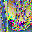

In [107]:
img2 = transforms.Normalize(mean, std)(img)
transforms.ToPILImage()(img2)

In [109]:
training_data.data.shape

(73257, 3, 32, 32)

In [110]:
global_mean = training_data.data.mean(axis=1)
global_std = training_data.data.std(axis=1)

In [111]:
global_mean

array([[[ 33.66666667,  19.        ,  17.        , ...,  64.33333333,
          72.        ,  75.66666667],
        [ 34.        ,  20.33333333,  17.        , ...,  43.        ,
          59.        ,  73.66666667],
        [ 39.66666667,  21.66666667,  18.66666667, ...,  32.33333333,
          40.33333333,  64.66666667],
        ...,
        [ 80.66666667,  80.        ,  75.33333333, ...,  98.33333333,
          96.66666667,  95.33333333],
        [ 78.        ,  79.        ,  76.66666667, ...,  99.        ,
          98.66666667,  98.66666667],
        [ 80.33333333,  81.        ,  77.        , ..., 100.66666667,
         100.        ,  96.        ]],

       [[ 73.        ,  75.        ,  70.33333333, ...,  79.        ,
          77.33333333,  77.33333333],
        [ 74.33333333,  73.33333333,  67.33333333, ...,  78.33333333,
          79.        ,  78.66666667],
        [ 73.        ,  71.        ,  55.        , ...,  79.33333333,
          79.        ,  79.        ],
        ...,


In [112]:
global_std

array([[[ 3.29983165,  3.26598632,  1.63299316, ...,  6.5489609 ,
         10.8012345 , 12.47219129],
        [ 4.54606057,  4.64279609,  2.44948974, ...,  4.96655481,
          6.164414  ,  9.87702159],
        [ 1.24721913,  3.29983165,  3.09120617, ...,  9.28559218,
          3.8586123 ,  8.33999734],
        ...,
        [ 4.49691252,  6.68331255,  7.40870359, ...,  8.01387685,
         11.0855261 , 12.28368385],
        [ 9.93310962,  5.71547607,  4.10960934, ..., 10.98483804,
          9.67241209,  8.99382504],
        [ 8.80656321,  6.97614985,  7.48331477, ..., 10.07747764,
         10.03327796, 12.08304597]],

       [[10.42433051,  8.28653526, 10.14341604, ...,  8.60232527,
          8.57645355,  8.99382504],
        [ 9.97775303,  7.76029782,  6.23609564, ..., 10.53037933,
          7.34846923,  8.7305339 ],
        [ 9.62635272,  9.20144916,  4.54606057, ..., 11.72840806,
          9.41629793,  6.4807407 ],
        ...,
        [12.75408431,  9.56846673,  9.93310962, ...,  

In [113]:
transform_norm = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize([64, 64], antialias=True),
    transforms.Normalize(mean, std)
])

In [115]:
training_data.transform = transform_norm

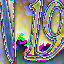

In [116]:
img, label = training_data[0]
transforms.ToPILImage()(img)

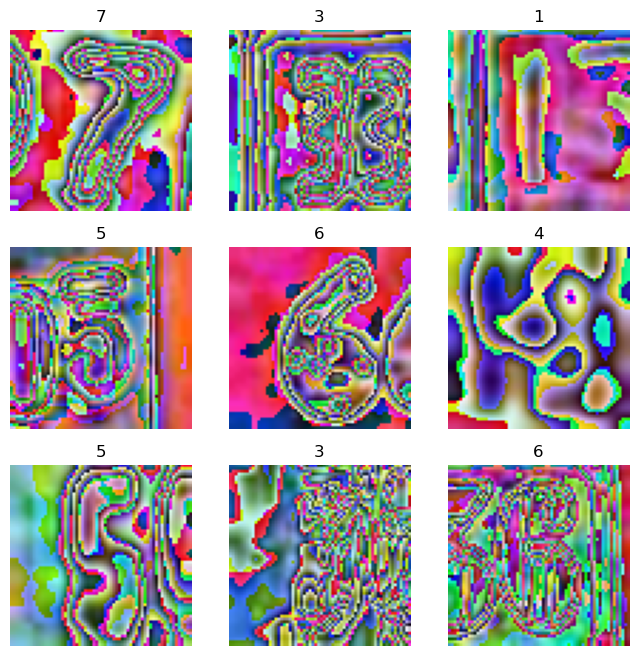

In [125]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, 10):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(str(label))
    plt.axis("off")
    plt.imshow(transforms.ToPILImage()(img))
plt.show()

In [127]:
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=False)

Feature batch shape: torch.Size([64, 3, 64, 64])
Feature batch shape: torch.Size([64, 3, 64, 64])


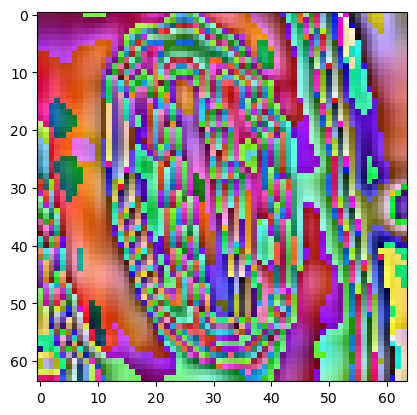

Label: 0


In [130]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Feature batch shape: {train_features.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(transforms.ToPILImage()(img))
plt.show()
print(f"Label: {label}")